# Boston house prices prediction

In [2]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers
from matplotlib import pyplot as plt
import numpy as np

## Data loading and exploration

In [3]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [4]:
print('Train data shape: {0}, Train targets shape: {1}'.format(train_data.shape, train_targets.shape))
print('Test data shape: {0}, Test targets shape: {1}'.format(test_data.shape, test_targets.shape))

Train data shape: (404, 13), Train targets shape: (404,)
Test data shape: (102, 13), Test targets shape: (102,)


## Data preprocessing

In [5]:
# Normalizing the data
data_mean = train_data.mean(axis=0)
train_data -= data_mean
data_std = train_data.std(axis=0)
train_data /= data_std

test_data -= data_mean
test_data /= data_std

## Model definition

In [6]:
def build_model():
    '''
    Builds a small network with two hidden layers, each with 64 units.
    
    '''
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

processing fold 0
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
processing fold 1
processing fold 2
processing fold 3


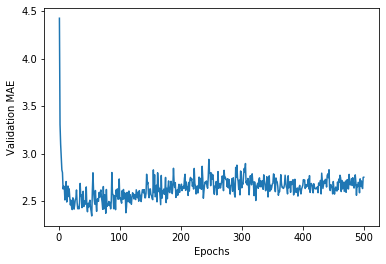

In [7]:
## K-fold validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold {0}'.format(i))
    
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], 
                                        train_data[(i + 1) * num_val_samples:]], 
                                        axis=0)
    
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                           train_targets[(i + 1) * num_val_samples:]],
                                           axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [8]:
model = build_model()
history = model.fit(train_data, train_targets, epochs=80, batch_size=16)

Epoch 1/80
404/404 [==============================] - 0s 222us/sample - loss: 458.7876 - mean_absolute_error: 19.2536
Epoch 2/80
404/404 [==============================] - 0s 46us/sample - loss: 257.9618 - mean_absolute_error: 13.5006
Epoch 3/80
404/404 [==============================] - 0s 50us/sample - loss: 105.8091 - mean_absolute_error: 7.8472
Epoch 4/80
404/404 [==============================] - 0s 49us/sample - loss: 49.0337 - mean_absolute_error: 5.1360
Epoch 5/80
404/404 [==============================] - 0s 50us/sample - loss: 30.6942 - mean_absolute_error: 3.9855
Epoch 6/80
404/404 [==============================] - 0s 54us/sample - loss: 23.8793 - mean_absolute_error: 3.5117
Epoch 7/80
404/404 [==============================] - 0s 53us/sample - loss: 20.6381 - mean_absolute_error: 3.2059
Epoch 8/80
404/404 [==============================] - 0s 52us/sample - loss: 18.4341 - mean_absolute_error: 2.9977
Epoch 9/80
404/404 [==============================] - 0s 55us/sample - los

404/404 [==============================] - 0s 52us/sample - loss: 6.2344 - mean_absolute_error: 1.7271
Epoch 73/80
404/404 [==============================] - 0s 52us/sample - loss: 6.2142 - mean_absolute_error: 1.7610
Epoch 74/80
404/404 [==============================] - 0s 53us/sample - loss: 6.2246 - mean_absolute_error: 1.7177
Epoch 75/80
404/404 [==============================] - 0s 51us/sample - loss: 5.9987 - mean_absolute_error: 1.7464
Epoch 76/80
404/404 [==============================] - 0s 50us/sample - loss: 5.9675 - mean_absolute_error: 1.6758
Epoch 77/80
404/404 [==============================] - 0s 51us/sample - loss: 5.9821 - mean_absolute_error: 1.7337
Epoch 78/80
404/404 [==============================] - 0s 52us/sample - loss: 5.8832 - mean_absolute_error: 1.6930
Epoch 79/80
404/404 [==============================] - 0s 53us/sample - loss: 6.0365 - mean_absolute_error: 1.7315
Epoch 80/80
404/404 [==============================] - 0s 51us/sample - loss: 5.9192 - mean_

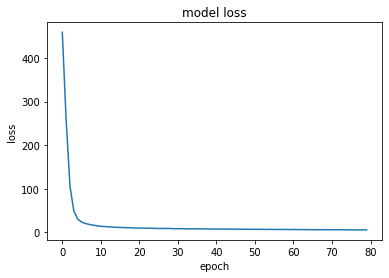

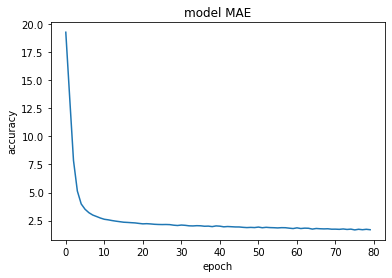

In [9]:
# Loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Accuracy
plt.plot(history.history['mean_absolute_error'])
plt.title('model MAE')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

## Results analysis

In [10]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 343us/sample - loss: 17.6489 - mean_absolute_error: 2.6490


In [11]:
test_mae_score

2.6489594

In [12]:
test_predictions = model.predict(test_data)

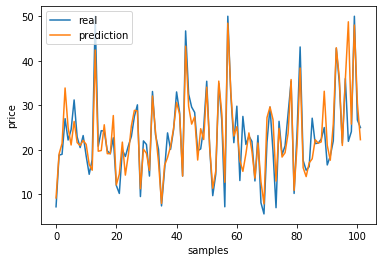

In [13]:
plt.plot(test_targets)
plt.plot(test_predictions)
plt.ylabel('price')
plt.xlabel('samples')
plt.legend(['real', 'prediction'], loc='upper left')
plt.show()